In [1]:
import pywt
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [2]:
def image_normalization(src_img):
    """
    白飛び防止のための正規化処理
    cv2.imshowでwavelet変換された画像を表示するときに必要（大きい値を持つ画像の時だけ）
    """
    norm_img = (src_img - np.min(src_img)) / (np.max(src_img) - np.min(src_img))
    return norm_img

def merge_images(cA, cH_V_D):
    """numpy.array を４つ(左上、(右上、左下、右下))連結させる"""
    cH, cV, cD = cH_V_D
    cH = image_normalization(cH) # 外してもok
    cV = image_normalization(cV) # 外してもok
    cD = image_normalization(cD) # 外してもok
    cA = cA[0:cH.shape[0], 0:cV.shape[1]] # 元画像が2の累乗でない場合、端数ができることがあるので、サイズを合わせる。小さい方に合わせます。
    return np.vstack((np.hstack((cA,cH)), np.hstack((cV, cD)))) # 左上、右上、左下、右下、で画素をくっつける

def coeffs_visualization(cof):
    norm_cof0 = cof[0]
    norm_cof0 = image_normalization(norm_cof0) # 外してもok
    merge = norm_cof0
    for i in range(1, len(cof)):
        merge = merge_images(merge, cof[i])# ４つの画像を合わせていく
    plt.gray()
    plt.imshow(merge)

def wavelet_transform_for_image(src_image, level, M_WAVELET="db1", mode="sym"):
    data = src_image.astype(np.float64)
    coeffs = pywt.wavedec2(data, M_WAVELET, level=level, mode=mode)
    return coeffs

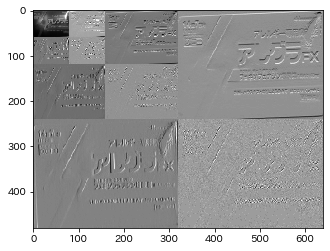

In [3]:
LEVEL = 3

# 'haar', 'db', 'sym' etc...#db1
# URL: http://pywavelets.readthedocs.io/en/latest/ref/wavelets.html
MOTHER_WAVELET = "db1"
wavelet_list = []
    
im = cv2.imread('color.jpg')
img_gray = cv2.imread('color.jpg', 0)
img_gray = cv2.resize(img_gray, (640, 480))
h, w = img_gray.shape
# x_padding = 640 - w
# y_padding = 480 - h
# img_gray = cv2.copyMakeBorder(img_gray, 0, y_padding, 0, x_padding, cv2.BORDER_CONSTANT, (0,0,0))

#         print('LEVEL :', LEVEL)
#         print('MOTHER_WAVELET', MOTHER_WAVELET)
#         print('original image size: ', im.shape)

"""
各BGRチャネル毎に変換
cv2.imreadはB,G,Rの順番で画像を吐き出すので注意
"""
B = 0
G = 1
R = 2
coeffs_B = wavelet_transform_for_image(im[:, :, B], LEVEL, M_WAVELET=MOTHER_WAVELET)
coeffs_G = wavelet_transform_for_image(im[:, :, G], LEVEL, M_WAVELET=MOTHER_WAVELET)
coeffs_R = wavelet_transform_for_image(im[:, :, R], LEVEL, M_WAVELET=MOTHER_WAVELET)
coeffs_gray = wavelet_transform_for_image(img_gray, LEVEL, M_WAVELET=MOTHER_WAVELET)
coeffs_visualization(coeffs_gray)